In [56]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
from implementations import *
from proj1_helpers import *
from preprocessing import *
from crossvalidation import *
from plots import *

# Main with split jet

As we have seen on the data exploration on the  ```main.ipynb ```, there is one categorical feature called  ```PRI_JET_NUM ``` which indicates the number of jets per sample (0, 1, 2 or 3). On this second main, we take advantage of this variable to split our dataset and fit our models on the newly split data.

#### Load the training data into feature matrix, class labels, and event ids:

In [58]:
DATA_TRAIN_PATH = '../data/train.csv'
DATA_TEST_PATH = '../data/test.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=False)
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH, sub_sample=False)
features_name = np.genfromtxt('../data/train.csv', delimiter=",", dtype=str,max_rows=1)[2:]

## Applying methods

In [59]:
seed = 1

### Method 1 : least_squares_GD

#### "Parameters pre-tuning"

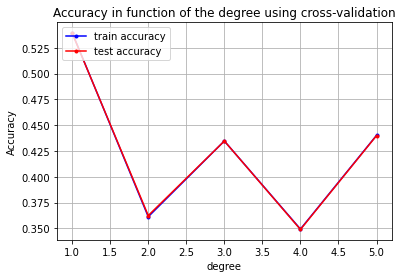

Accuracies for different degree :
[0.539304, 0.362476, 0.434688, 0.348952, 0.439928]


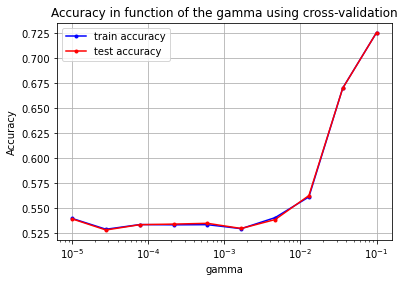

Accuracies for different gamma :
[0.53928, 0.528196, 0.533504, 0.534088, 0.534864, 0.5297080000000001, 0.5385960000000001, 0.5625560000000001, 0.6698, 0.725432]


In [60]:
#Fixed parameters :
k_fold=4
max_iters = 50

#Parameters to tune :
degrees = 1+np.arange(5)
gamma= 1e-13

best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y, tX, k_fold, least_squares_GD, seed=seed, params=degrees, gamma=gamma, max_iters=max_iters, name='degree', jet=True)

CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

print("Accuracies for different degree :")
print(acc_te_deg)

#Parameters to tune :
degree = best_degree
gammas= np.logspace(-5, -1, 10)

best_gam, acc_te_gam, acc_tr_gam = tune_best_one(y, tX, k_fold, least_squares_GD, seed=seed, params=gammas, degree=degree, max_iters=max_iters, name='gamma', jet=True)

CV_param_plot(gammas, acc_tr_gam, acc_te_gam, name_param="gamma")

print("Accuracies for different gamma :")
print(acc_te_gam)

Using this "pre-tuning", we can apply tune simultanesouly degree and gamma on a smaller grid search (to avoid very long computation).

In [61]:
degrees = [1, 2]
gammas = np.linspace(1e-2, 1e-1, 9)

#### Parameters tuning

In [62]:
# cross validation
deg_ls_gd, gamma_ls_gd, acc_te_ls_gd, acc_tr_ls_gd = tune_best_deg_gam(y, tX, k_fold, least_squares_GD, degrees=degrees, gammas=gammas, seed=seed, max_iters=max_iters, jet=True)
print('The degree obtaining the maximum test accuracy is : ', deg_ls_gd)
print(' ')
print('Combined with a best learning rate gamma : ', gamma_ls_gd)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_ls_gd)
print(' ')
print('While the train accuracy is : ', acc_tr_ls_gd)

The degree obtaining the maximum test accuracy is :  1
 
Combined with a best learning rate gamma :  0.01
 
And the associated maximum test accuracy is :  0.547872
 
While the train accuracy is :  0.5483573333333334


### Method 2 : least_squares_SGD

#### "Parameters pre-tuning"

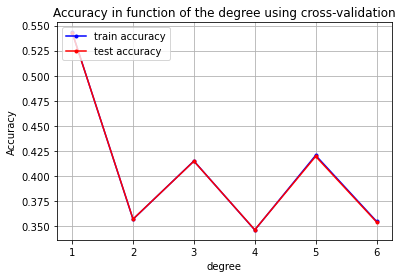

Accuracies for different degree :
[0.5431199999999999, 0.356692, 0.414556, 0.345996, 0.419356, 0.35383200000000004]


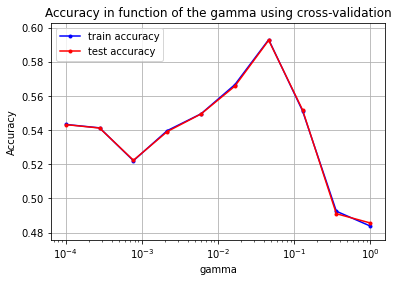

Accuracies for different gamma :
[0.543196, 0.54118, 0.522304, 0.5391159999999999, 0.5494439999999999, 0.56572, 0.5926, 0.551844, 0.491004, 0.485616]


In [63]:
#Fixed parameters :
k_fold=4
max_iters = 50
batch_size = 1

#Parameters to tune :
degrees = 1+np.arange(6)
gamma=1e-9

best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y, tX, k_fold, least_squares_SGD, seed=seed, params=degrees, gamma=gamma, batch_size=batch_size, max_iters=max_iters, name='degree', jet=True)

CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

print("Accuracies for different degree :")
print(acc_te_deg)

#Parameters to tune :
degree = best_degree
gammas=np.logspace(-4, 0, 10)

best_gam, acc_te_gam, acc_tr_gam = tune_best_one(y, tX, k_fold, least_squares_SGD, seed=seed, params=gammas, degree=degree, max_iters=max_iters, batch_size=batch_size, name='gamma', jet=True)

CV_param_plot(gammas, acc_tr_gam, acc_te_gam, name_param="gamma")

print("Accuracies for different gamma :")
print(acc_te_gam)

Using this "pre-tuning", we can apply tune simultanesouly degree and gamma on a smaller grid search (to avoid very long computation).

In [64]:
degrees = [1, 2, 3]
gammas = np.linspace(1e-2, 1e-1, 5)

#### Parameters tuning

In [65]:
# cross validation
deg_ls_sgd, gamma_ls_sgd, acc_te_ls_sgd, acc_tr_ls_sgd = tune_best_deg_gam(y, tX, k_fold, least_squares_SGD, degrees=degrees, gammas=gammas, seed=seed, batch_size=batch_size, max_iters=max_iters, jet=True)
print('The degree obtaining the maximum test accuracy is : ', deg_ls_sgd)
print(' ')
print('Combined with a best learning rate gamma : ', gamma_ls_sgd)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_ls_sgd)
print(' ')
print('While the train accuracy is : ', acc_tr_ls_sgd)

The degree obtaining the maximum test accuracy is :  1
 
Combined with a best learning rate gamma :  0.1
 
And the associated maximum test accuracy is :  0.512248
 
While the train accuracy is :  0.5139986666666667


### Method 3 : least_squares

#### Parameters tuning

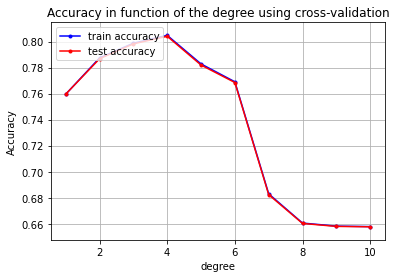

The degree obtaining the maximum test accuracy is :  4
 
And the associated maximum test accuracy is :  0.804028
 
While the train accuracy is :  0.8047293333333334


In [66]:
# parameters
degrees = 1+ np.arange(10)
k_fold = 4

#Plot
best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y, tX, k_fold, least_squares, seed=seed, params=degrees, name='degree', jet=True)
CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

# cross validation

deg_ls, acc_te_ls, acc_tr_ls = tune_best_deg(y, tX, k_fold, least_squares, degrees=degrees, seed=seed, jet=True)
print('The degree obtaining the maximum test accuracy is : ', deg_ls)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_ls)
print(' ')
print('While the train accuracy is : ', acc_tr_ls)

### Method 4 : ridge_regression

#### "Parameters pre-tuning"

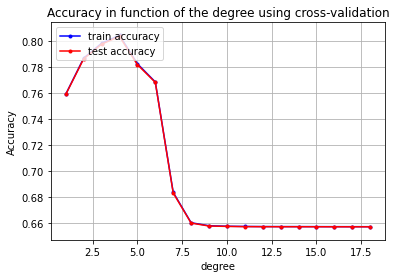

Accuracies for different degree :
[0.75918, 0.786588, 0.797876, 0.8037839999999999, 0.7820800000000001, 0.768432, 0.68332, 0.660212, 0.657944, 0.65764, 0.6574800000000001, 0.657428, 0.657404, 0.657404, 0.657392, 0.657368, 0.657356, 0.657344]


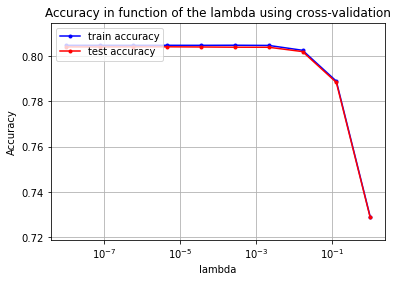

Accuracies for different lambda :
[0.804024, 0.804032, 0.804056, 0.804064, 0.803992, 0.8039, 0.803872, 0.8019560000000001, 0.78836, 0.7288399999999999]


In [67]:
# parameters
k_fold = 4

#Parameters to tune :
degrees = 1+ np.arange(18)
lambda_ = 1e-03 

best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y, tX, k_fold, ridge_regression, seed=seed, params=degrees, lambda_=lambda_, name='degree', jet=True)

CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

print("Accuracies for different degree :")
print(acc_te_deg)

#Parameters to tune :
degree = best_degree
lambdas = np.logspace(-8, 0, 10)

best_lam, acc_te_lam, acc_tr_lam = tune_best_one(y, tX, k_fold, ridge_regression, seed=seed, params=lambdas, degree=degree, name='lambda', jet=True)

CV_param_plot(lambdas, acc_tr_lam, acc_te_lam, name_param="lambda")

print("Accuracies for different lambda :")
print(acc_te_lam)

Using this "pre-tuning", we can apply tune simultanesouly degree and gamma on a smaller grid search (to avoid very long computation).

In [68]:
degrees = [1, 2, 3, 4, 5, 6]
lambdas = np.logspace(-8, -3, 6)

#### Parameters tuning

In [69]:
# cross validation
deg_rr, lambda_rr, acc_te_rr, acc_tr_rr = tune_best_deg_lam(y, tX, k_fold, ridge_regression, degrees=degrees, lambdas=lambdas, seed=seed, jet=True)

print('The degree obtaining the maximum test accuracy is : ', deg_rr)
print(' ')
print('With a lambda equal to : ', lambda_rr)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_rr)
print(' ')
print('While the train error is : ', acc_tr_rr)

The degree obtaining the maximum test accuracy is :  4
 
With a lambda equal to :  0.0001
 
And the associated maximum test accuracy is :  0.8044
 
While the train error is :  0.8050826666666666


### Method 5 : logistic_regression

#### "Parameters pre-tuning"

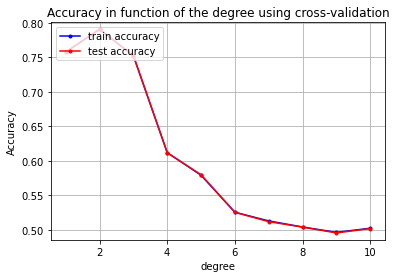

Accuracies for different degree :
[0.7579480000000001, 0.790748, 0.75264, 0.6115879999999999, 0.5797159999999999, 0.5252760000000001, 0.511648, 0.503748, 0.49532, 0.5015999999999999]


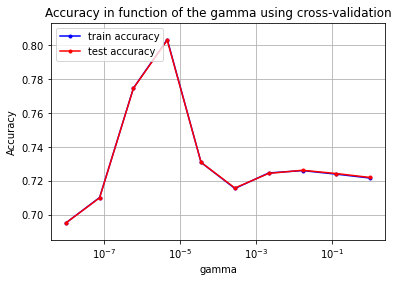

Accuracies for different gamma :
[0.6950960000000002, 0.709984, 0.774616, 0.8029559999999999, 0.730872, 0.7157640000000001, 0.724384, 0.726228, 0.7242919999999999, 0.721988]


In [70]:
# parameters
k_fold = 4
max_iters = 50

#Parameters to tune :
degrees = 1+ np.arange(10)
gamma = 1e-05

best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y, tX, k_fold, logistic_regression, seed=seed, params=degrees, gamma=gamma, max_iters=max_iters, name='degree', log=True, jet=True)

CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

print("Accuracies for different degree :")
print(acc_te_deg)

#Parameters to tune :
degree = best_degree
gammas = np.logspace(-8, 0, 10)

best_gam, acc_te_gam, acc_tr_gam = tune_best_one(y, tX, k_fold, logistic_regression, seed=seed, params=gammas, degree=degree, max_iters=max_iters, name='gamma', log=True, jet=True)

CV_param_plot(gammas, acc_tr_gam, acc_te_gam, name_param="gamma")

print("Accuracies for different gamma :")
print(acc_te_gam)

Using this "pre-tuning", we can apply tune simultanesouly degree and gamma on a smaller grid search (to avoid very long computation).

In [71]:
degrees = [1, 2, 3]
gammas = np.logspace(-7, -4, 5)

#### Parameters tuning

In [72]:
# cross validation
deg_lr, gam_lr, acc_te_lr, acc_tr_lr = tune_best_deg_gam(y, tX, k_fold, logistic_regression, degrees=degrees, gammas=gammas, max_iters=max_iters, log=True, seed=seed, jet=True)

print('The degree obtaining the maximum test accuracy is : ', deg_lr)
print(' ')
print('With a learning rate equal to : ', gam_lr)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_lr)
print(' ')
print('While the train accuracy is : ', acc_tr_lr)

The degree obtaining the maximum test accuracy is :  2
 
With a learning rate equal to :  1e-07
 
And the associated maximum test accuracy is :  0.7146
 
While the train accuracy is :  0.7146613333333334


### Method 6 : reg_logistic_regression

#### "Parameters pre-tuning"

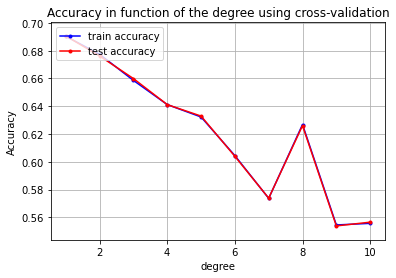

Accuracies for different degree :
[0.690688, 0.67622, 0.659944, 0.641184, 0.63292, 0.6039279999999999, 0.5738, 0.6260760000000001, 0.553788, 0.5564880000000001]


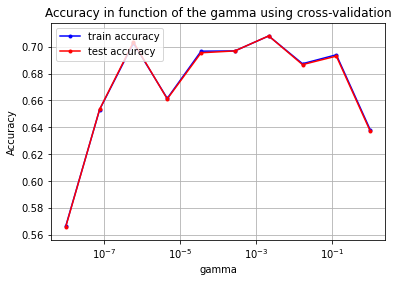

Accuracies for different gamma :
[0.5659080000000001, 0.6533599999999999, 0.7035, 0.66108, 0.695524, 0.696916, 0.7081120000000001, 0.6867040000000001, 0.693036, 0.637232]


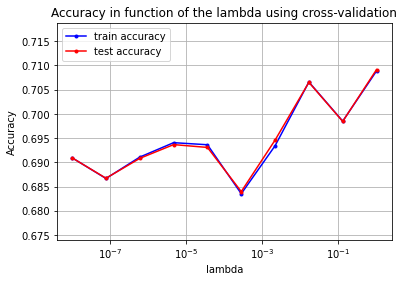

Accuracies for different lambda :
[0.6909200000000001, 0.6867159999999999, 0.690824, 0.693664, 0.6930799999999999, 0.683964, 0.6945919999999999, 0.70652, 0.698456, 0.709156]


In [73]:
# parameters
k_fold = 4
max_iters=50


#Parameters to tune :
degrees=1+ np.arange(10)
gamma=0.0001
lambda_=1e-5

best_degree, acc_te_deg, acc_tr_deg = tune_best_one(y, tX, k_fold, reg_logistic_regression, seed=seed, params=degrees, gamma=gamma, lambda_=lambda_, max_iters=max_iters, name='degree', log=True, jet=True)

CV_param_plot(degrees, acc_tr_deg, acc_te_deg, name_param="degree")

print("Accuracies for different degree :")
print(acc_te_deg)

#Parameters to tune :
degree=best_degree
gammas=np.logspace(-8, 0, 10)
lambda_=1e-5

best_gam, acc_te_gam, acc_tr_gam = tune_best_one(y, tX, k_fold, reg_logistic_regression, seed=seed, params=gammas, degree=degree, lambda_=lambda_, max_iters=max_iters, name='gamma', log=True, jet=True)

CV_param_plot(gammas, acc_tr_gam, acc_te_gam, name_param="gamma")

print("Accuracies for different gamma :")
print(acc_te_gam)

#Parameters to tune :
degree=best_degree
gamma=best_gam
lambdas=np.logspace(-8, 0, 10)

best_lam, acc_te_lam, acc_tr_lam = tune_best_one(y, tX, k_fold, reg_logistic_regression, seed=seed, params=lambdas, degree=degree, gamma=gamma, max_iters=max_iters, name='lambda', log=True, jet=True)

CV_param_plot(lambdas, acc_tr_lam, acc_te_lam, name_param="lambda")

print("Accuracies for different lambda :")
print(acc_te_lam)

Using this "pre-tuning", we can apply tune simultanesouly degree and gamma on a smaller grid search (to avoid very long computation).

In [74]:
degrees=[1, 2, 3]
gammas=np.logspace(-7, -1, 10)
lambdas=np.logspace(-5, -1, 10)

#### Parameters tuning

In [75]:
# cross validation
deg_lr_reg, gam_lr_reg, lambda_lr_reg, acc_te_lr_reg, acc_tr_lr_reg = tune_best_deg_lam_gam(y, tX, k_fold, reg_logistic_regression, degrees=degrees,
                                                                 lambdas=lambdas, gammas=gammas, log=True, seed=seed, jet=True) 

print('The degree obtaining the maximum test accuracy is : ', deg_lr_reg)
print(' ')
print('With a gamma equal to : ', gam_lr_reg)
print(' ')
print('and a lambda equal to : ', lambda_lr_reg)
print(' ')
print('And the associated maximum test accuracy is : ', acc_te_lr_reg)
print(' ')
print('While the train accuracy is : ', acc_tr_lr_reg)

The degree obtaining the maximum test accuracy is :  2
 
With a gamma equal to :  0.021544346900318822
 
and a lambda equal to :  0.004641588833612777
 
And the associated maximum test accuracy is :  0.717632
 
While the train accuracy is :  0.7181013333333333


## Compare methods

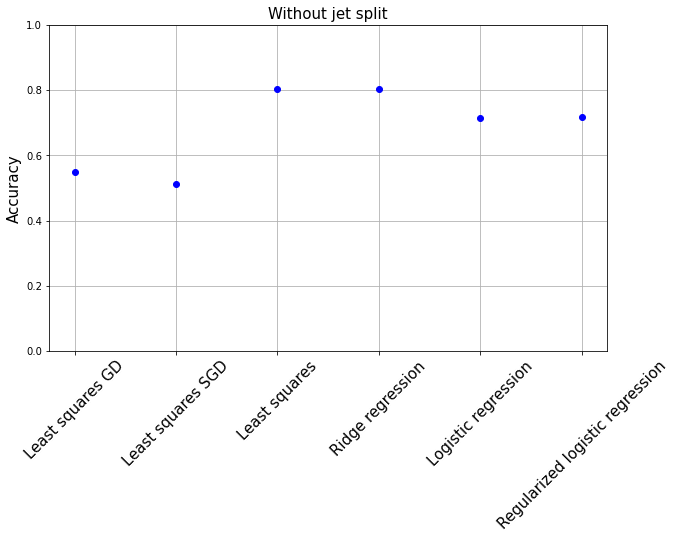

In [76]:
accuracies = [acc_te_ls_gd, acc_te_ls_sgd, acc_te_ls, acc_te_rr, acc_te_lr, acc_te_lr_reg]
methods = ['Least squares GD', 'Least squares SGD', 'Least squares', 'Ridge regression', 'Logistic regression', 'Regularized logistic regression']

compare(methods, accuracies)